# 앙상블
- 여러개의 분류 모델을 조합해서 더 나은 성능을 내는 방법

## RandomForest
: 의사결정트리를 Bagging(단일 모델 조합)해서 예측을 실행하는 모델

In [1]:
from sklearn import datasets
import numpy as np
np.random.seed(5)

In [3]:
mnist = datasets.load_digits()
X, y = mnist.data, mnist.target

In [6]:
# 의사결정 나무를 이용한 10번의 교차검증 10회 실시
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
cv_scores = []
for i in range(10):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)

[0.819137181874612, 0.8285878336436996, 0.8274736188702668, 0.8280446927374301, 0.8319304779639974, 0.8308162631905649, 0.8230446927374302, 0.8269056486654252, 0.8280229671011794, 0.8352638112973307]


In [7]:
# RandomForestClassifier를 이용한 10번의 교차검증 10회 실시
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
cv_scores = []
for i in range(10):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)

[0.9499068901303538, 0.9527001862197393, 0.9476908752327746, 0.9521446306641836, 0.9504686530105524, 0.9415549348230912, 0.9510273122284294, 0.947687771570453, 0.9487988826815641, 0.9510273122284294]


In [12]:
def cross_validation(classifier, X, y):
    cv_scores = []
    for i in range(10):
        scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    return cv_scores

In [13]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), X, y)
rf_cv_scores = cross_validation(RandomForestClassifier(), X, y)
print(dt_cv_scores)
print(rf_cv_scores)


[0.834137181874612, 0.839723774053383, 0.8263780260707636, 0.8219242706393544, 0.8308131595282434, 0.8152234636871508, 0.8341558038485413, 0.8352638112973307, 0.8336064556176288, 0.8246772191185598]
[0.9476784605834885, 0.9526877715704531, 0.9549224084419615, 0.9549193047796398, 0.9476846679081316, 0.9476753569211669, 0.9482464307883302, 0.948786468032278, 0.9482371198013656, 0.9432278088144008]


## 랜덤포레스트와 의사결정나무 정확도 시각화

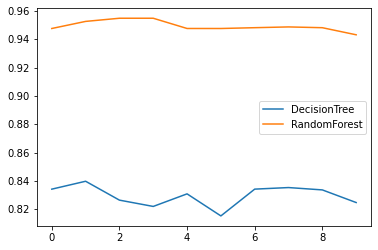

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

cv_list = {'DecisionTree': dt_cv_scores, 'RandomForest': rf_cv_scores}
df = pd.DataFrame(cv_list)
# xlim
df.plot()
plt.show()

---
# 보팅(voting) 앙상블
- 단일 모델들을 앙상블하여 더 나은 예측을 하는 모델 생성

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 단일 모델들의 정확도 측정

In [25]:
# import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
# 의사결정 나무
dtree = DecisionTreeClassifier().fit(X_train, y_train)
dtree_score = dtree.score(X_test, y_test)
print('의사결정나무: ', round(dtree_score,4))


# KNN
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print('KNN: ', round(knn_score,4))

# SVM
svm = SVC(probability=True).fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print('SVM: ', round(svm_score,4))


의사결정나무:  0.8361
KNN:  0.9806
SVM:  0.9806


### 하드 보팅
: 각각의 분류기의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식

In [39]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
  estimators=[('dt', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1, 1, 1],
    voting='hard'
  ).fit(X_train, y_train)
voting_clf_score = voting_clf.score(X_test, y_test)
print('Voting: ', round(voting_clf_score,4))

Voting:  0.9778


# 소프트 보팅
: 각각의 분류모델을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종결론을 내는 방식   
: 과대적합이 안 생김

In [36]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
  estimators=[
    ('dt', dtree), ('knn', knn), ('svm', svm)],
  voting='soft')
voting_clf = voting_clf.fit(X_train, y_train)
voting_clf_score = voting_clf.score(X_test, y_test)
print('Voting: ', round(voting_clf_score,4))

Voting:  0.975
